In [1]:
import folium

print(folium.__file__)
print(folium.__version__)

C:\Users\Kamol\Anaconda3\lib\site-packages\folium\__init__.py
0.5.0


In [2]:
import re
import mplleaflet
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import pygeohash as gh
from datetime import datetime
import ast
import random
import pickle
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import string
import sklearn.mixture as mix
import nltk
import pandas as pd
import os
import glob
import random

# Data Module

In [3]:
#lets make some synthetic data using 10 clusters
28.484729, -81.303576
25.900733, -80.257058
33.690498, -84.347379
30.052072, -95.895370
35.496962, -117.322002
lat_mu=[28.484729,25.900733,33.690498,30.052072,35.496962]
lon_mu= [-81.303576,-80.257058,-84.347379,-95.895370,-117.322002]
sigma=.2

lats=[]
lons=[]

for i in range(len(lat_mu)):
    for j in np.random.normal(lat_mu[i], sigma, 1000):
        lats.append(j)
    for j in np.random.normal(lon_mu[i], sigma, 1000):
        lons.append(j)    

Data_df=pd.DataFrame({})
Data_df['lon']=lons
Data_df['lat']=lats
Data_df['time']=pd.date_range(start='1/1/2018', periods=5000)

In [4]:
Data_df.head()

,lon,lat,time
0,-81.580157,28.823217,2018-01-01
1,-81.375397,28.510006,2018-01-02
2,-81.276460,28.558631,2018-01-03
3,-81.238670,28.576664,2018-01-04
4,-81.073157,28.451653,2018-01-05


# Social Media Module

In [5]:
#We run api for 10 minutes to get twitter sample text content

In [6]:
punct=set(string.punctuation)
stop_words = set(stopwords.words('english'))
bad_words=["b","''","n't","https","'s","'ve","rt","b'rt"]

def text_cleaner(texts):
#    texts=texts.split("'")[1]
    word_split=word_tokenize(texts)
    filtered_word1=[w.lower() for w in word_split if not w in punct]
    filtered_word2=[w for w in filtered_word1 if not w in stop_words]
    filtered_word2=[w for w in filtered_word2 if not type(w ) in [type(5.0), type(5)]]
    filtered_word3=[w for w in filtered_word2 if not w.lower() in bad_words]
    filtered_sent=" ".join(filtered_word3) 
    filtered_text=" ".join(filter(lambda x:x[0]!='#', filtered_sent.split()))
    filtered_text=" ".join(filter(lambda x:x[0]!='/', filtered_text.split()))
    filtered_text=" ".join(filter(lambda x:x[0]!="\\", filtered_text.split()))
    filtered_text=" ".join(filter(lambda x:x[0]!='https', filtered_text.split()))
    filtered_text="".join(word for word in filtered_text if "\\" not in r"%r" % word)
    return filtered_text 

In [7]:
input=r"C:\Safety Visualization\SOM_data.json"
import json

Times=[]
texts=[]
lats=[]
lons=[]

with open(input,'r') as file:
    for line in file:
        if len(line)>5:
            json_line=json.loads(line)
            tweet_id=json_line['id']
            user_id=json_line['user']['id']
            text=json_line['text']
            timestamp=json_line['created_at']
            coords=json_line['coordinates']
            if str(coords)!='None' and len(text.split())>2:
                lat=coords['coordinates'][1]
                lon=coords['coordinates'][0]
                lats.append(lat)
                lons.append(lon)
                texts.append(text)
#                texts.append(text_cleaner(text))
                Times.append(timestamp)
            


In [8]:
SOM_df=pd.DataFrame()
SOM_df['Time']=Times
SOM_df['lat']=lats
SOM_df['lon']=lons
SOM_df['texts']=texts


In [9]:
SOM_df

,Time,lat,lon,texts
0,Wed Jul 25 05:07:36 +0000 2018,38.485783,-121.512381,Traffic Collision - Unknown Injury: I5 S at ju...
1,Wed Jul 25 05:08:03 +0000 2018,53.533165,0.003621,Good Morning.\n\nI took this photo Sunday afte...
2,Wed Jul 25 05:08:31 +0000 2018,-28.388680,153.564410,Thanks caba_cottage for this snap and bike rid...
3,Wed Jul 25 05:12:34 +0000 2018,2.300347,102.310427,Kembali ke melaka darul traffic light (@ Plaza...
4,Wed Jul 25 05:13:27 +0000 2018,-26.174145,28.230039,(U/D) 145706: Crash (Multi Vehicle) on N12 Wes...
5,Wed Jul 25 05:15:36 +0000 2018,37.546620,-77.443970,"Thanks for letting me crash the party, fellas...."
6,Wed Jul 25 05:16:37 +0000 2018,-26.122567,28.236147,(U/D) 145714: Crash (Multi Vehicle) on R21 Sou...
7,Wed Jul 25 05:18:29 +0000 2018,33.655007,-84.508747,TTG will be in the building at the Largest Wee...
8,Wed Jul 25 05:20:54 +0000 2018,29.956825,-90.065356,Tuesday bike nite 🚲 #nola @ FrenchQuarter NewO...
9,Wed Jul 25 05:28:19 +0000 2018,41.265450,-95.923830,Nebraska &amp; Iowa bridge! Pretty cool! @ Bob...


# Analytics Module

In [10]:
import numpy as np
import pandas as pd
import numpy.ma as ma

def make_data():
    time= pd.date_range(start='7/25/2018', freq='1H',periods=24)
    calculated_risk = [random.uniform(0, .7) for i in range(len(time))]
    return pd.DataFrame(np.asanyarray([time, calculated_risk]).T, columns=['time', 'risk'])

df = make_data()
resolution, width, height = 75, 7, 3

In [11]:
df.head()

,time,risk
0,2018-07-25 00:00:00,0.184982
1,2018-07-25 01:00:00,0.67809
2,2018-07-25 02:00:00,0.454653
3,2018-07-25 03:00:00,0.31716
4,2018-07-25 04:00:00,0.261313


In [12]:
import base64
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

station = '42'
fig, ax = plt.subplots(figsize=(width, height))
ax.plot(df['time'],df['risk'])

fmat = '%H:%M\n%p'
ax.xaxis.set_major_locator(mticker.MaxNLocator(8)) 
ax.xaxis.set_major_formatter(mdates.DateFormatter(fmat))
ax.set_ylim((0,1))
ax.set_ylabel('Calculated Risk')
png = 'mpld3_{}.png'.format(station)
fig.savefig(png, dpi=resolution)

encoded = base64.b64encode(open(png, 'rb').read()).decode()

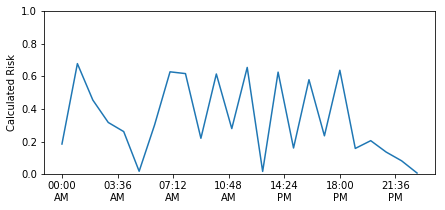

In [13]:
fig

# Visualization Module 

## Suggested Layers

In [14]:
import folium
import pandas as pd
from folium import plugins
from folium import IFrame

feature_group = folium.FeatureGroup(name='HeatMap Layer')
feature_group1 = folium.FeatureGroup(name='Crowd Sourced Information')
feature_group2 = folium.FeatureGroup(name='Trend in Recent Crash History')
feature_group3 = folium.FeatureGroup(name='Risk Forecast')
feature_group4 = folium.FeatureGroup(name='Crash Modification Factor')


## Mapping

### Add heatmap

In [15]:
m = folium.Map([27.5, -81.5], zoom_start=4)

data=[[row['lat'],row['lon']] for index, row in Data_df.iterrows()]
hm = plugins.HeatMap(data).add_to(feature_group)

### Add analytics

In [16]:
lat_lon=[(float(row['lat']),float(row['lon'])) for index, row in SOM_df.iterrows()]
for lat, lon in lat_lon:

    html = '<img src="data:image/png;base64,{}">'.format
    iframe = IFrame(html(encoded), width=(width*resolution)+20, height=(height*resolution)+20)
    popup = folium.Popup(iframe, max_width=2650)

    icon = folium.Icon(color="red", icon="ok")
    marker = folium.Marker(location=[lat-2, lon-1], popup=popup, icon=icon).add_to(feature_group3)

### Add CMF

In [17]:
Combined_cmf='Combined_cmf.png'
encoded = base64.b64encode(open(Combined_cmf, 'rb').read()).decode()


for lat, lon in lat_lon:
    html = '<img src="data:image/png;base64,{}">'.format
    iframe = IFrame(html(encoded), width=(width*resolution)+20, height=(height*resolution)+20)
    popup = folium.Popup(iframe, max_width=2650)

    icon = folium.Icon(color="green", icon="chart")
    marker = folium.Marker(location=[lat+.5, lon+.5], popup=popup, icon=icon).add_to(feature_group4)

### Add Social Media

In [18]:

for i in lat_lon:
    df = SOM_df[(SOM_df['lat']==i[0]) & (SOM_df['lon']==i[1])]
    df=df.reset_index()
#    df['text']=df.apply(lambda x: text_cleaner(x.text), axis=1)
    df=df[['Time','texts']].astype(str)
    df=df.set_index('Time')
    html = df.to_html()
    popup = folium.Popup(html,max_width=800)    
    folium.Marker(i, popup=popup).add_to(feature_group1)

### Combine Everything

In [19]:
m.add_child(feature_group)
m.add_child(feature_group1)
m.add_child(feature_group2)
m.add_child(feature_group3)
m.add_child(feature_group4)
m.add_child(folium.map.LayerControl())

In [20]:
m.save('Visualization_challenge.html')